<a href="https://colab.research.google.com/github/MarioBolanos/Modelado-y-Simulacion/blob/master/Numerical%20Methods/Metodo_de_Euler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Método de Euler


## Introducción

Resolver ecuaciones diferenciales es fundamental tanto para la física como para las matemáticas. Las ecuaciones diferenciales ordinarias, ODE para abreviar, aparecen en todo tipo de problemas de la física, ya sea en la mecánica newtoniana (donde intentamos encontrar las ecuaciones del movimiento), la teoría electromagnética o la mecánica cuántica. Sin embargo, la mayoría de las veces, estas EDO no tienen soluciones analíticas y tenemos que resolverlas numéricamente. En este cuaderno daremos una revisión extensa del método de Euler, el algoritmo más simple para resolver EDO. En contraste con nuestro otro cuaderno sobre el método de Euler, * [Implementación simple del método de Euler] (https://github.com/MarioBolanos/Metodo-de-Euler/blob/master/Eulers_method___implementation__done.ipynb) *, cubriremos el algoritmo bastante a fondo, ya que mostraremos la derivación del método, las estimaciones de error y la estabilidad. Por último, mostraremos cómo podemos utilizar el método de Euler para resolver ecuaciones diferenciales de orden superior, reduciéndolas a un sistema de ecuaciones diferenciales de primer orden.

Comencemos dando un ejemplo concreto sobre qué tipo de problema deseamos resolver. Considere la ecuación diferencial de primer orden

\begin{equation}
\frac{d}{dt} y(t) = g(y(t), t),
\tag{1}
\end{equation}


donde $ y (t) $ es la función que queremos calcular, y $ g (y (t), t) $ es una función que puede depender de $ y (t) $, pero también puede tener una dependencia temporal explícita. Si tenemos la condición inicial $ y (0) = y_0 $, ¿cómo resolvemos $ (1) $? Analíticamente existen multitud de esquemas diferentes para resolver este tipo de ecuaciones, todos con sus propias limitaciones y áreas de uso. Un ejemplo de esto es el *[factor de integración](https://en.wikipedia.org/wiki/Integrating_factor) *, que es un esquema con el que el lector ya podría estar familiarizado. Sin embargo, todos estos esquemas analíticos dependen de la __existencia__ de una solución analítica. Al resolver la ecuación $ (1) $ numéricamente, no estamos restringidos a este tipo de EDO y, por lo tanto, hemos abierto una caja de Pandora de nuevas EDO que podemos resolver.

## Teoría

### Discretización

Una de las desventajas de usar esquemas numéricos para resolver EDO es que tenemos que * discretizar * nuestras variables de tiempo. Esto significa que la variable de tiempo $ t $, solo puede tomar un conjunto de valores de tiempo discretos predeterminados, llamados puntos de cuadrícula, ya no es una variable continua. Definimos este conjunto de posibles valores de tiempo para estar en el formulario

$$
t_n = t_0 + nh, \quad \mathrm{with} \quad n = 0, 1, 2,..., N,
$$

donde $ t_0 $ a menudo es el valor de tiempo donde conocemos nuestra condición inicial, y $ h $ es el tamaño entre valores de tiempo discretos adyacentes. La relación entre $ N $ y $ h $ está dada por

\begin{equation}
h = \frac{t_N - t_0}{N},
\tag{2}
\end{equation}

donde $ N + 1 $ es el número de puntos de tiempo discretos que tenemos en nuestra simulación (donde el + 1 aparece debido a nuestra elección de indexación cero), mientras que $ t_N $ denota el mayor valor de tiempo que tenemos en nuestra simulación. Podría pensar en $ h $ como la tosquedad de nuestra variable de tiempo; cuanto menor sea $ h $, más puntos de cuadrícula necesitamos para cubrir el mismo intervalo de tiempo. Por ejemplo, si queremos discretizar el intervalo $ [0,1] $ de manera que tengamos puntos de la cuadrícula cada 0.01 segundos, es decir, la distancia entre los puntos de la cuadrícula es 0.01 (recuerde que esta es nuestra definición de $ h $), usamos ecuación $ (2) $, para deducir que necesitamos $ N = 100 $. En general, nuestra aproximación numérica será mejor si elegimos $ h $ pequeños. Observe que a medida que disminuye el tamaño de $ h $, aumenta el número de valores de tiempo discretos entre $ t_0 $ y $ t_N $. Pagamos por el mayor nivel de precisión aumentando el número de cálculos necesarios, aumentando así el tiempo de ejecución de nuestro programa. Es muy recomendable reflexionar sobre cuál es la tosquedad necesaria de nuestra variable de tiempo discretizada antes de resolver un problema.

### Método de Euler

Hay varias formas de derivar el método de Euler. Aquí presentamos una prueba que gira en torno a la serie de Taylor, por lo que se requiere cálculo básico para seguir la demostración. Cualquier función "agradable" (no detallamos lo que esto requiere) $ y (t) $ puede escribirse como
\begin{equation}
y(t) = \sum_{n=0}^{\infty} \frac{y^{(n)}(t_0)}{n!}(t-t_0)^n, = y(t_0) + \frac{y'(t_0)}{1!}(t-t_0) + \frac{y''(t_0)}{2!}(t-t_0)^2 + ...
\tag{3}
\end{equation}

donde $ t_0 $ es un valor arbitrario. Decimos que expandimos $ y (t) $ alrededor de $ t_0 $. Ahora usamos el teorema de Taylor y truncamos la serie en el primer orden

\begin{equation}
y(t_0 + h) = y(t_0) + \frac{y'(t_0)}{1!}h + \frac{1}{2!}h^2 y''(\tau),
\tag{4}
\end{equation}

por unos $ \ tau \ en [t_0, t_0 + h] $. Reorganizando la ecuación $ (4) $ y despejando $ y '(t_0) $ obtenemos

\begin{equation}
y'(t_0) = \frac{y(t_0 + h)- y(t_0)}{h} + \mathcal{O}(h), 
\tag{5}
\end{equation}

donde usamos * [notación O grande] (https://en.wikipedia.org/wiki/Big_O_notation) *. Ahora usamos la idea esencial del método de Euler, de $ (1) $, sabemos la expresión exacta de $ y '(t_0) $ porque sabemos que $ y' (t) = g (y (t), t)$ PS Insertando esto en $ (5) $ y despejando $ y (t_0 + h) $ we get 

\begin{equation}
y(t_0 + h) = y(t_0) + h g(y(t_0), t_0) + \mathcal{O}(h^2).
\tag{6}
\end{equation}

Por lo tanto, mediante la ecuación $ (6) $ tenemos una estimación de cuál es el valor de $ y $ en nuestro primer punto de la cuadrícula $ t = t_0 + h $! Al elegir $ h $ lo suficientemente pequeño (y esperando que el término $ \mathcal {O} $ no sea demasiado grande), nuestra estimación será bastante precisa. Descuidando el término $ \mathcal {O} $, escribimos

\begin{equation}
y(t_0 + h) \approx y(t_0) + h g(y(t_0), t_0).
\tag{7}
\end{equation}


Si tenemos nuestra condición inicial en $ t_0 $ y denotamos este valor como $ y_0 $, podemos usar el método de Euler para encontrar una aproximación de $ y $ en $ t_1 = t_0 + h $. $ y $ en $ t_1 $ se denota como $ y_1 $. Esta aproximación se puede calcular mediante la fórmula
$$
y_1 = y_0 + hg(y_0).
$$

Ahora, para encontrar el tamaño de la población $ y_2 $ en $ t_2 = t_1 + h = t_0 + 2h $, usamos la misma fórmula, pero con $ y_1 $ en lugar de $ y_0 $

$$
y_2 = y_1 + h g(y_1).
$$

La forma más general del método de Euler se escribe como

\begin{equation}
y_{n+1} = y_n + h g(y_n).
\tag{8}
\end{equation}

Ahora ilustraremos cómo implementar el método de Euler usando el mismo ejemplo que en nuestro * [Implementación del cuaderno de métodos de Euler] (https://github.com/MarioBolanos/Metodo-de-Euler/blob/master/Eulers_method___implementation__done.ipynb) *.

\begin{equation}
\frac{dy}{dt} = ky(t),
\tag{9}
\end{equation}

donde $ k = \mathrm {ln} (2) $ y $ y (0) = 1 $. En el cuaderno anterior dijimos que $ y (t) $ era el tamaño de la población de una colonia bacteriana en el momento $ t $, y repetimos la notación aquí. Podemos resolver la ecuación $ (9) $ analíticamente para obtener $ y(t) = 2^ t $, por lo que tenemos algo con lo que comparar nuestros resultados numéricos.


In [ ]:
# Importing the necessary libraries
import numpy as np # NumPy is used to generate arrays and to perform some mathematical operations
import matplotlib.pyplot as plt # Used for plotting results

# Updating figure params
newparams = {'figure.figsize': (15, 7), 'axes.grid': False,
             'lines.markersize': 10, 'lines.linewidth': 2,
             'font.size': 15, 'mathtext.fontset': 'stix',
             'font.family': 'STIXGeneral', 'figure.dpi': 200}
plt.rcParams.update(newparams)


In [ ]:
def step_Euler(y, h, f):
    """Performs a single step of Euler's method.
    
    Parameters:
            y: Numerical approximation of y at time t
            h: Step size
            f: RHS of our ODE (RHS = Right hand side). Can be any function that only has y as a variable.
        Returns:
            next_y: Numerical approximation of y at time t+h
    """
    next_y = y + h * f(y)
    return next_y


def full_Euler(h, f, y_0 = 1, start_t = 0, end_t = 1):
    """ A full numerical aproximation of an ODE in a set time interval. Performs consecutive Euler steps
    with step size h from start time until the end time. Also takes into account the initial values of the ODE
    
    Parameters:
            h: Step size
            f: RHS of our ODE
            y_0 : Initial condition for y at t = start_t
            start_t : The time at the initial condtion, t_0
            end_t : The end of the interval where the Euler method is perfomed, t_N
        Returns:
            y_list: Numerical approximation of y at times t_list
            t_list: Evenly spaced discrete list of time with spacing h. 
                    Starting time = start_t, and end time = end_t 
    """
    # Number of discretisation steps
    N = int((end_t - start_t) / h)
    # Following the notation in the theory, we have N+1 discrete time values linearly spaced
    t_list = np.linspace(start_t, end_t, N + 1)
    
    # Initialise array to store y-values
    y_list = np.zeros(N + 1)
    # Assign initial condition to first element
    y_list[0] = y_0
    
    # Assign the rest of the array using N Euler_steps
    for i in range(0, N):
        y_list[i + 1] = step_Euler(y_list[i], h, f)
    return y_list, t_list 

Ahora que tenemos nuestras funciones definidas, solo necesitamos definir nuestro RHS (lado derecho) de nuestra ecuación diferencial, que en la parte de la teoría denotamos como $ g (y) $.



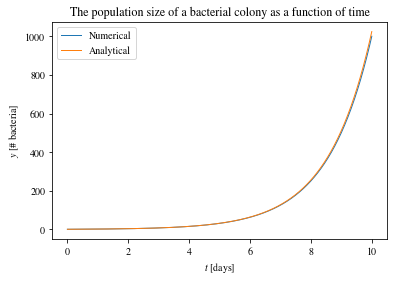

After 10 days, our numerical approximation of bacterias is off by: 24.20


In [ ]:
def g(y):
    """Defines the right hand side of our differential equation. In our case of bacterial growth, g(y) = k*y
    
    Parameters:
            y: Numerical approximation of y at time t
        Returns:
            growth_rate: Current population size multiplied with a constant of proportionality.
            In this case this is equal to ln(2)
    """
    growth_rate = np.log(2)*y
    return growth_rate

# Now we can find the the numerical results from Euler's method
# and compare them to the analytical solution

# Input parameters
y_0 = 1  # Initial population size, i.e. a single bacteria
h = 0.01 # Step size
t_0 = 0  # We define the time at our initial observation as 0
t_N = 10 # 10 days after our initial observation of a single bacteria


# Calculating results from Euler and plotting them
y_list, t_list = full_Euler(h, g, y_0, t_0, t_N)
plt.plot(t_list, y_list, label="Numerical", linewidth=1)

# Plotting the analytical solution derived earlier
plt.plot(t_list,np.power(2, t_list), label="Analytical", linewidth=1)

# Making the plot look nice
plt.legend()
plt.title("The population size of a bacterial colony as a function of time")
plt.xlabel(r'$t$ [days]')
plt.ylabel(r'$y$ [# bacteria]')
plt.show()

# Let's see how far off our numerical approximation is after 5 days.

last_analytical = np.power(2,t_list[-1]) # Extracting the last element of the analytical solution
last_numerical = y_list[-1] # Extracting the last element of the numerical solution

print("After 10 days, our numerical approximation of bacterias is off by: %.2f" %(last_analytical - last_numerical))

We see that our model fares quite well with a step size $h=0.0
1$, as it only deviates from the analytical solution by 24 bacteria cells, or 2.4 %. Using a smaller $h$ would yield a smaller error, and this is the next theoretical aspect we will consider.

### Errores de truncamiento local y global

En la sección de teoría anterior, mostramos las siguientes relaciones
\begin{equation}
y(t_0 + h) = y(t_0) + h g(y(t_0), t_0) + \mathcal{O}(h^2)
\\
y(t_0 + h) \approx y(t_0) + h g(y(t_0), t_0).
\tag{10}
\end{equation}

La primera ecuación es __exact__, mientras que la otra es una aproximación. El método de Taylor-expandir una función y truncarla en un cierto orden se usa ampliamente en física (de hecho, es la piedra angular en casi todos los campos de la física). Sin embargo, es importante estudiar las consecuencias de esta aproximación.

En el análisis numérico, un concepto importante es el error de truncamiento __local__. Esto describe el error que cometemos después de cada paso de tiempo. Si tenemos la condición inicial $ y_0 $, podemos usar nuestro esquema numérico para encontrar una aproximación de lo que debería ser $ y (t_0 + h) $, denotado $ y_ {approx} (t_0 + h) $. Esto es lo que hacemos en la segunda línea de arriba. Si luego comparamos esta aproximación con la solución __exact__ (es decir, la primera línea), denotada $ y_ {exact} (t_0 + h) $, podemos encontrar el error de truncamiento local en el primer paso de tiempo, denotado $ \tau_1 $
\begin{equation}
\tau_1 = \mid y_{exact}(t_0 + h) - y_{approx}(t_0 + h) \mid.
\tag{11}
\end{equation}

Usando la ecuación $ (10) $, vemos que $ \tau_1 = \mathcal {O} (h ^ 2) $. Por lo tanto, nuestro error de truncamiento local es de segundo orden, lo que significa que si usamos un $ h $ que es solo la mitad del $ h $ original, el error de truncamiento local sería una cuarta parte del tamaño original.

De forma análoga al error de truncamiento local, tenemos el error de truncamiento __global__. En cada paso de tiempo de nuestra simulación numérica, tendremos una aproximación de $ y (t) $ en $ t = t_n $, denotado $ y_ {approx} (t_n) $. El error de truncamiento global, $ e_n $. Se define como

\begin{equation}
e_n = \mid y_{exact}(t_n) - y_{approx}(t_n) \mid.
\tag{12}
\end{equation}

La ecuación $ (12) $ describe qué tan lejos está nuestro esquema numérico de la solución exacta. Tenga en cuenta que el error de truncamiento global no es la suma de todos los errores de truncamiento local, sino la acumulación de errores cometidos en cada paso (es decir, la suma de los errores de truncamiento local __si__ se definieron sin el valor absoluto). Aquí presentamos un enfoque algo heurístico para encontrar $ e_n $. Si sabemos que nuestro error de truncamiento local es del orden $ \mathcal {O} (h ^ 2) $, sabemos que para cada paso de tiempo obtenemos el error $ ah ^ 2 $, donde $ a $ es solo una constante. Para llegar a $ t_N $, necesitamos hacer $ N $ pasos, y usando la ecuación $ (2) $ vemos que el número de pasos necesarios es inversamente proporcional a $ h $. Por tanto, el error acumulado $ e_N = ah ^ 2 \frac {1} {h} = a h $. Por lo tanto, nuestra conclusión es que el error de truncamiento global para el método de Euler es del orden $ \mathcal {O} (h) $. Tenga en cuenta que esta relación se mantiene en general. Si un esquema de ODE tiene un error de truncamiento local $ \mathcal {O} (h ^ {p + 1}) $, el error de truncamiento global es $ \mathcal {O} (h ^ {p}) $.

¡Ahora, pongamos en práctica la teoría que aquí se deriva! El siguiente código puede ser un poco más técnico de lo que hemos hecho hasta ahora, pero vale la pena el esfuerzo a medida que redescubrimos nuestros resultados teóricos. 

In [ ]:
from prettytable import PrettyTable  # This is imported solely to get the output on a nice format


def trunc_errors(f, base=2, h_max_log=-1, h_min_log=-6, y_0=1, start_t=0, end_t=2):
    """A full numerical approximation of an ODE in a set time interval. Performs consecutive Euler steps
    with step size h from start time until the end time. Also takes into account the initial values of the ODE.
    Returns both the local and global truncation error for each step size.

    Parameters:
            f: RHS of our ODE
            base: The base of our logspace, our h_list is created by taking: base **(h_list_log)
            h_min_log: Our smallest element in our h_list is defined by: base**(h_min_log)
            h_max_log: Our largest element in our h_list is defined by: base**(h_max_log)
            y_0 : Initial condition for y at t = start_t
            start_t : The time at the initial condition, t_0
            end_t : The end of the interval where the Euler method is performed, t_N
        Returns:
            t: Table containing the time step size, the global truncation error and the local truncation error
    """
    K = h_max_log - h_min_log + 1
    h_list = np.logspace(h_min_log, h_max_log, K, base=base)  # Crates an array that is evenly spaced on a logscale
    t = PrettyTable(['h', 'Global truncation error', 'Local truncation error'])
    for i in range(len(h_list)):
        y_list, t_list = full_Euler(h_list[i], g, y_0, start_t, end_t)  # Runs Euler Algorithm with a given h
        analytic_list = np.power(2, t_list)
        # Want to format our output nicely, thus we need to add h, Global trunc error
        # and Local trunc error (for the first time step) to our row
        t.add_row([h_list[i], np.abs(y_list[-1] - analytic_list[-1]), np.abs(y_list[1] - analytic_list[1])])
    t.sortby = "h"  # Formatting the table
    t.reversesort = True
    print(t)
    return t


t = trunc_errors(g, 2, h_min_log=-8)



+------------+-------------------------+------------------------+
|     h      | Global truncation error | Local truncation error |
+------------+-------------------------+------------------------+
|    0.5     |    0.7120865983468994   |  0.06763997209312245   |
|    0.25    |   0.40885068263221713   |  0.015920319862734678  |
|   0.125    |   0.22086218920020384   |  0.003864335095264515  |
|   0.0625   |   0.11506573325497316   | 0.0009520836424172785  |
|  0.03125   |   0.05876725013275852   | 0.00023629926161827797 |
|  0.015625  |   0.029702418263456654  | 5.886135545130067e-05  |
| 0.0078125  |   0.014932231644601224  | 1.4688764678139066e-05 |
| 0.00390625 |   0.007486540203270664  |  3.66887614022815e-06  |
+------------+-------------------------+------------------------+


Claramente, el error de truncamiento global es de orden $ \mathcal {O} (h) $ ya que cada vez que cortamos $ h $ a la mitad, el error de truncamiento correspondiente también se reduce a la mitad, mientras que el error de truncamiento local es una cuarta parte del anterior.

El orden del error de truncamiento global es lo que define el __orden__ de un método numérico para resolver EDO. Decimos que el método de Euler es un método de primer orden. Existe una multitud de formas diferentes de resolver EDO, donde el método de Euler es el más simple.

Para el trabajo numérico que es más sensible a errores (por ejemplo, simulaciones largas de movimientos planetarios), el trabajo adicional de implementar un método de orden superior bien vale la inversión, ya que la cantidad de pasos de tiempo requeridos es a menudo mucho menor.

### Inestabilidad

Ahora demostraremos un ejemplo teórico simple que ilustra cómo el método de Euler puede fallar, es decir, la solución numérica comienza a desviarse de la solución exacta de manera dramática. Por lo general, esto sucede cuando la solución numérica aumenta en magnitud mientras que la solución exacta permanece pequeña.

Echemos un vistazo a la EDO

$$
\frac{dy}{dt} = -y \quad \mathrm{with} \quad y(0) = 1.
$$

Trivialmente, esto tiene la solución exacta $ y (t) = \mathrm {e} ^ {- t} $. Sin embargo, si mira lo que sucede con un solo paso en el método de Euler usando la ecuación $ (8) $

\begin{equation}
y_{n+1} = y_n + h g(y_n) = y_n - h y_n = (1-h) y_n.
\end{equation}

Observe que para $ h = 1 $, nuestra solución simplemente se vuelve cero de inmediato, si $ h> 1 $, nuestra solución oscilará entre valores positivos y negativos. Si $ h> 2 $ nuestra solución crecerá sin límite (en valor absoluto), mientras oscila entre valores positivos y negativos. ¡Los tres casos son drásticamente diferentes de la solución exacta! En este cuaderno no entraremos en más detalles sobre la inestabilidad, pero elegimos incluir este ejemplo para demostrar cómo fallarán los métodos numéricos bajo ciertas condiciones.



### Derivados de orden superior

Por último, presentaremos cómo es posible utilizar el método de Euler para resolver ecuaciones diferenciales de orden superior. Desafortunadamente, hay un poco de ambigüedad con respecto a la nomenclatura aquí. Ya hemos hablado del __orden de nuestro solucionador de ODE__, pero ahora introducimos el __orden de la ecuación diferencial__ que queremos resolver. El orden de este último es simplemente la derivada de mayor orden que aparece en nuestra EDO. Por ejemplo, la EDO
$$
\frac{d^3y}{dt^3} + \frac{dy}{dt} = -y,
$$
es de tercer orden.

#### Ejemplo: Esfera de metal caída de la Termosfera
En este ejemplo (altamente construido), dejaremos caer una esfera de metal de la termosfera y estudiaremos su trayectoria hacia la superficie de la tierra. Las capas superiores de la termosfera se encuentran a 400 km de la superficie de la tierra. Usando la fórmula de Newton para la gravedad, podemos calcular que la constante gravitacional aquí arriba es 8.70 m / s ^ 2, mientras que en la superficie de la tierra es 9.82 m / s ^ 2. Por lo tanto, necesitamos actualizar nuestro valor de la fuerza gravitacional, denotado $ F_G $, mientras la esfera cae.

También necesitamos tener en cuenta la fuerza de arrastre ejercida sobre la esfera, denotada como $ F_D $. Escribamos la segunda ecuación de Newton para encontrar las ecuaciones de movimiento.
\begin{equation}
ma = m \frac{d^2y}{dt^2} = F_D + F_G = Dv^2 - \frac{GmM}{y^2}.
\tag{13}
\end{equation}

Aquí denotamos $ D $ como el coeficiente de arrastre, $ v $ como la velocidad de la esfera, $ G $ como la constante gravitacional (adecuada) y $ m $ y $ M $ como la masa de la esfera y de la tierra. respectivamente. Tenga en cuenta que el eje y apunta lejos de la tierra. Al reorganizar la ecuación $ (13) $ ligeramente, encontramos

\begin{equation}
\frac{d^2y}{dt^2} = \frac{D}{m} v^2 - \frac{GM}{y^2}.
\tag{14}
\end{equation}


Este formulario aún no está listo para usar nuestro algoritmo anterior, por lo que usaremos un truco final. Simplemente notamos $ \ frac {dy} {dt} = v $ y reescribimos la ecuación $ (14) $ una última vez como __dos__ ecuaciones.

\begin{equation}
\frac{dy}{dt} = v
\\
\frac{dv}{dt} = \frac{D}{m} v^2 - \frac{GM}{y^2}.
\tag{15}
\end{equation}

¡Hemos reducido nuestras ecuaciones diferenciales de segundo orden a un conjunto de dos ecuaciones de primer orden! Tenga en cuenta que todavía necesitamos dos condiciones iniciales, $ y_0 $ y $ v_0 $. Aplicando el método de Euler en estas dos ecuaciones llegamos a


\begin{equation}
y_{n+1} = y_n + h v_n
\\
v_{n+1} = v_n + h [ \frac{D}{m} v_n^2 - \frac{GM}{y_n^2}].
\tag{16}
\end{equation}

Esto se puede generalizar aún más para resolver una ecuación diferencial de orden N en un sistema de ecuación diferencial de primer orden $ N $ y es una herramienta poderosa para resolver EDO de orden superior. Ahora introduciremos la notación convencional para resolver EDO de orden superior introduciendo el vector $ \ vec {w_n} $ definido como

$$
\vec{w_n} = \begin{bmatrix}y_n \\ v_n\end{bmatrix}.
$$

Sea $ f $ una función que transforme nuestro $ w_n $ como se describe en la ecuación $ (16) $,
$$
f(\vec{w_n} ) = f \begin{bmatrix}y_n \\ v_n\end{bmatrix} = \begin{bmatrix}v_n \\ \frac{D}{m} v_n^2 - \frac{GM}{y_n^2}\end{bmatrix}.
$$


sin dependencia del tiempo, de modo que$$
\dot{\vec{w_n}}=f(\vec{w_n}). 
$$
Para el lector interesado, ampliamos más sobre este tema en los cuadernos * Métodos de Runge-Kutta. Implementando la función $ f $ como nuestro lado derecho de nuestra EDO y ajustando ligeramente nuestras funciones anteriores, podemos estudiar la trayectoria de nuestra esfera.

In [ ]:
## Higher order differential equations

def step_Euler_high(w, t, h, f, deg):
    """Performs a single step of Euler's method on vector form.

    Parameters:
            w: Numerical approximation of w at time t
            t: The time the Euler step is preformed at
            h: Step size
            f: RHS of our ODE
        Returns:
            next_w: Numerical approximation of x at time t+h
    """
    next_w = w + h * f(w, t, deg)
    return next_w


# We are going to store data in matrix form, so we illustrate the structure of the matrix here for clarity

# The matrix M will have the following form when completly filled with data:
# 
# M[ROW, COLUMN]
# The number of rows is equal to the degree of the ODE, denoted k
# Here we show how it will look for the problem discussed above
#           N COLUMNS 
#    -----------------------------------
#   | y0   y1   y2   ...  y_N-2   y_N-1
#   | v0   v1   v2   ...  v_N-2   v_N-1
# 
# Writing ":" in M[ROWS, COLUMNS] such as M[:, 0] returns an array containing
# the first column. M[0, :] returns the first row
#

def full_Euler_high(h, f, init_cond, start_t=0, end_t=1):
    """ A full numerical approximation of an ODE in a set time interval.Performs consecutive Euler steps
    with step size h from start time until the end time. Also takes into account the initial values of the ODE

    Parameters:
            h: Step size
            f: RHS of our ODE (vector function)
            init_cond: Array containing the necessary initial conditions
            start_t : The time at the initial condition
            end_t : The end of the interval where the Euler method is performed
        Returns:
            M: Matrix with number of rows equal to the order of the ODE, and N columns
            Contains the numerical approximation of the variable we wish to solve at times t_list
            t_list: Evenly spaced discrete time list with spacing h, starting time = start_t, and end time = end_t
    """
    deg = len(init_cond) # The order of the ODE is equal to the number of initial conditions we need
    N = int((end_t - start_t) / h)
    t_list = np.linspace(start_t, end_t, N + 1)
    M = np.zeros((deg, N + 1)) # Matrix storing the values of the variable we wish to solve for
    # (the zeroth derivative), as well as the higher order derivatives
    M[:, 0] = init_cond # Storing the initial conditions
    for i in range(0, N):
        M[:,i + 1] = step_Euler_high(M[:, i], t_list[i], h, f, deg) # Running N Euler steps
    return M, t_list

In [ ]:
D = 0.0025 # Drag coefficient
m = 1 # mass of the metal sphere
M_earth = 5.97 * 10 ** 24 # Mass of the earth
G = 6.67 * 10 ** (-11) # Gravitational constant


def g(w, t, deg):
    """Defines the right hand side of our differential equation. In our case it is a vector function that
    determines the equation of motion.

        Parameters:
                w: Numerical approximation of w at time t
                t: Time, not relevant here as we have no explicit time dependence
                deg: Degree of the ODE we wish to solve
            Returns:
                next_w: Numerical approximation of w at time t
        """
    next_w = np.zeros(deg)
    next_w[0] = w[1]
    next_w[1] = D * w[1] ** 2 / m - G * M_earth / w[0] ** 2

    return next_w


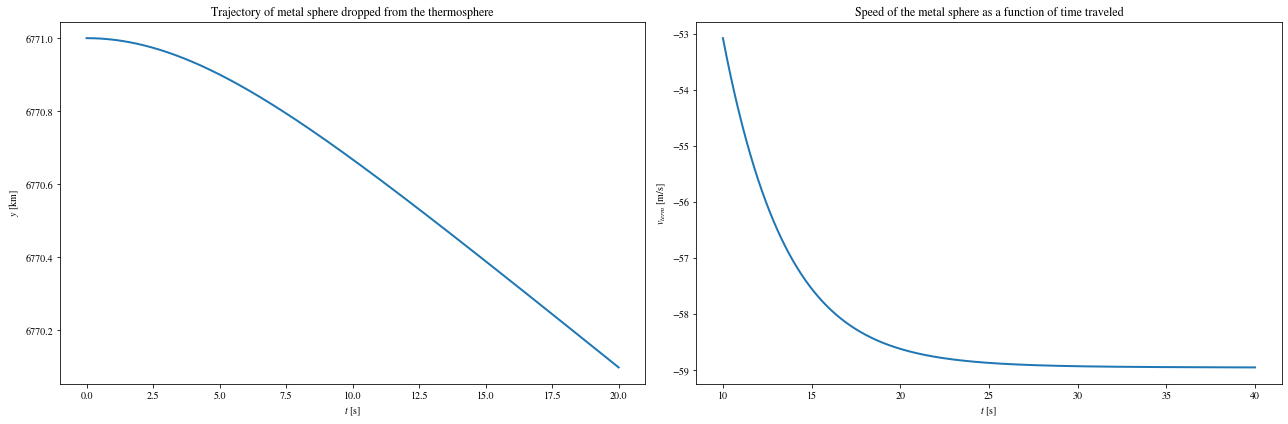

In [ ]:
M, t = full_Euler_high(0.01, g, np.array([6771*10**3,0]), 0, 200)

fig = plt.figure(figsize=(18, 6))  # Create figure and determine size

ax1 = plt.subplot(121)
ax1.set_title("Trajectory of metal sphere dropped from the thermosphere")
ax1.set_xlabel(r"$t$ [s]")
ax1.set_ylabel(r"$y$ [km]")
# Only plotting the first twenty seconds of the trajectory, and rescaling y into kilometres
plt.plot(t[:2000], M[0][:2000] / 10 ** 3)

ax2 = plt.subplot(122)
ax2.set_title("Speed of the metal sphere as a function of time traveled")
ax2.set_xlabel(r"$t$ [s]")
ax2.set_ylabel(r"$v_{term}$ [m/s]")
# Plotting the speed as a function of time in the interval [10 s, 20 s] to study how the speed changes
# after the main acceleration at the start of the free fall
ax2.plot(t[1000:4000], M[1][1000:4000])

fig.tight_layout()
plt.show()

Podemos considerar válidos los resultados producidos por el método de Euler debido a nuestra comprensión física del problema. En el gráfico de la derecha podemos estudiar la velocidad de la esfera de metal cuando cae hacia la tierra. El concepto de velocidad terminal. es decir, cuando la fuerza de arrastre es igual a la fuerza gravitacional, es útil aquí. Observamos que después de la aceleración inicial, la velocidad parece aplanarse en torno a los 60 m / s. Sin embargo, sabemos que la velocidad de la esfera debería aumentar aún más, ya que la atracción gravitacional de la tierra será más fuerte a medida que la esfera esté hacia el centro de la tierra (recuerde, la gravedad escala como $ \frac {1} { r ^ 2} $). Veamos si podemos observar este efecto en nuestra solución numérica.

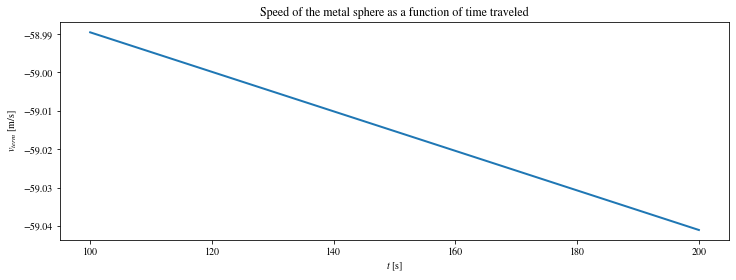

In [ ]:
fig = plt.figure(figsize=(12, 4))  # Create figure and determine size
plt.plot(t[10000:], M[1][10000:])
plt.title("Speed of the metal sphere as a function of time traveled")
plt.xlabel(r"$t$ [s]")
plt.ylabel(r"$v_{term}$ [m/s]")
plt.show()

¡Observamos claramente el efecto de la fuerza gravitacional creciente! Para obtener más ejemplos sobre cómo utilizar los principios físicos para determinar la validez de los resultados numéricos (es decir, conservación de energía, etc.), consulte nuestro cuaderno sobre [Movimiento de proyectil] (https://nbviewer.jupyter.org/urls/www.numfys.net /media/notebooks/projectile_motion.ipynb).

## Conclusión
El método de Euler es un procedimiento numérico simple para resolver ecuaciones diferenciales ordinarias, y su simplicidad se manifiesta tanto en la implementación numérica directa como en el poder del método para resolver problemas más complejos. Para problemas más sofisticados que son más propensos a errores numéricos, se deben considerar en su lugar métodos más poderosos, como el método de Runge-Kutta de cuarto orden (esto se hace en el cuaderno mencionado anteriormente). Sin embargo, para los ejemplos simples que consideramos aquí, ¡fue suficiente!